In [7]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import sympy
from custom_types import *
from tqdm import tqdm

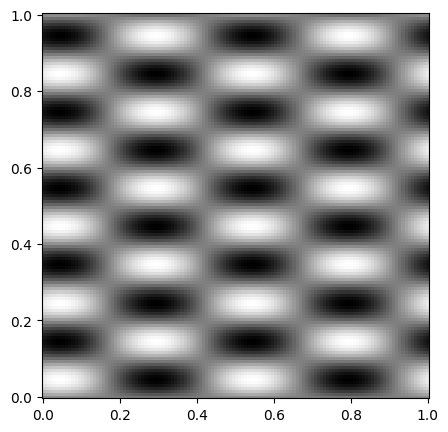

In [8]:
def sine_noise(
  x_frequency: float,
  y_frequency: float,
  x_phase: float,
  y_phase: float,
  x: float,
  y: float,
) -> CostFunction:
  return sympy.sin(x*2*np.pi*x_frequency + x_phase)*sympy.sin(y*2*np.pi*y_frequency + y_phase) * 0.5 + 0.5

if __name__ == "__main__":
  x, y = sympy.symbols("x y")
  noise = sine_noise(
    x_frequency=2,
    y_frequency=5,
    x_phase=1,
    y_phase=0.1,
    x=x,
    y=y,
  )

  resolution = 128
  field = np.empty((resolution, resolution))
  
  for v, u in tqdm(itertools.product(range(resolution), range(resolution)), leave=False, total=resolution*resolution):
    field[v,u] = noise\
      .subs(x, u/(resolution-1))\
      .subs(y, v/(resolution-1))

  fig, ax = plt.subplots(figsize=(5,5))

  ax.pcolor(np.linspace(0, 1, resolution), np.linspace(0, 1, resolution), field, cmap="gray")
